In [24]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [25]:
# Load the breast cancer dataset
breast_cancer_data = load_breast_cancer()

In [33]:
# Assign data to descriptive variable names
label_names = breast_cancer_data['target_names']
labels = breast_cancer_data['target']
feature_names = breast_cancer_data['feature_names']
features = breast_cancer_data['data']

In [42]:
# For confirmation
print("---------- Label Names ----------")
print(label_names.shape)
print(label_names)
print()

print("---------- Labels ----------")
print(labels.shape)
print(labels)
print()

print("---------- Feature Names ----------")
print(feature_names.shape)
print(feature_names)
print()

print("---------- Feature ----------")
print(features.shape)
print(features)
print()

---------- Label Names ----------
(2,)
['malignant' 'benign']

---------- Labels ----------
(569,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 

## `target`

機械学習の文脈において、`target` という用語は、通常、データセットにおける予測したい値や、分類問題におけるクラスラベルを指します。これらはモデルが学習するための「答え」や「真実の値」として機能します。

たとえば、乳がんデータセットにおいては、`target` 配列は各サンプルが良性（benign）か悪性（malignant）かを示すラベルが含まれています。これらのラベルは数値で表され、モデルの訓練に使用されます。モデルは、特徴量（features）を入力として受け取り、これらのラベル（target）を正確に予測するように学習します。

`target_names` は、これらの数値ラベルが実際にどのクラスに対応しているかを人間が理解しやすい形（通常は文字列）で提供します。例えば、乳がんデータセットでは `target_names` は `['malignant', 'benign']` のようになります。これは、数値ラベルの `0` が「悪性」を、`1` が「良性」を表すことを意味します。

In [27]:
# Split the data into training, validation, and test sets
train_ratio = 0.6
val_ratio = 0.3
test_ratio = 0.1
X_train, X_temp, y_train, y_temp = train_test_split(features, labels, test_size=1-train_ratio, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_ratio/(test_ratio+val_ratio), random_state=42)

### random_state
- `train_test_split` 関数の `random_state` パラメータは、分割時のデータのシャッフルを制御するために使われます。このパラメータに特定の整数値を設定することで、関数の呼び出し結果の再現性を保証することができます。

- 具体的には、`random_state` に同じ値を設定すると、関数を複数回実行しても、毎回同じ方法でデータがシャッフルされ、同じトレーニングセットとテストセットが生成されます。これにより、異なる実験やモデルトレーニングで一貫した結果を得ることが可能になり、実験の比較が公平になります。

- `random_state` を設定しない場合、`train_test_split` は毎回異なるランダムシードを使用してデータをシャッフルするため、結果の再現性は保証されません。

- `random_state=42` と設定することは、機械学習のコミュニティで一般的な慣習であり、特に理由がない限り42という数字を使うことがよくあります。これは、ランダムシードとして特に何か優れているわけではなく、単に「宇宙と人生の究極の疑問の答え」として知られる数字（ダグラス・アダムスの『銀河ヒッチハイク・ガイド』におけるジョーク）を使っているだけです。

In [28]:
# Initialize lists to store the accuracies for different numbers of neighbors
train_accuracy = []
test_accuracy = []
val_accuracy = []
neighborhood_sizes = range(1, 21)

In [29]:
# Evaluate KNN performance for different numbers of neighbors
for k in neighborhood_sizes:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)

    # Compute accuracy on the training set
    train_accuracy.append(knn_classifier.score(X_train, y_train))

    # Compute accuracy on the test set
    test_accuracy.append(knn_classifier.score(X_test, y_test))

    # Compute accuracy on the validation set
    val_accuracy.append(knn_classifier.score(X_val, y_val))

In [30]:
# Find the best number of neighbors based on validation accuracy
best_val_accuracy = np.max(val_accuracy)
best_n_neighbors = neighborhood_sizes[np.argmax(val_accuracy)]

In [31]:
# Output the best performance metrics
print(f"Best validation accuracy: {best_val_accuracy:.2f}")
print(f"Best number of neighbors: {best_n_neighbors}")
print(f"Test set accuracy with best number of neighbors: {test_accuracy[best_n_neighbors-1]:.2f}")

Best validation accuracy: 0.99
Best number of neighbors: 10
Test set accuracy with best number of neighbors: 0.96


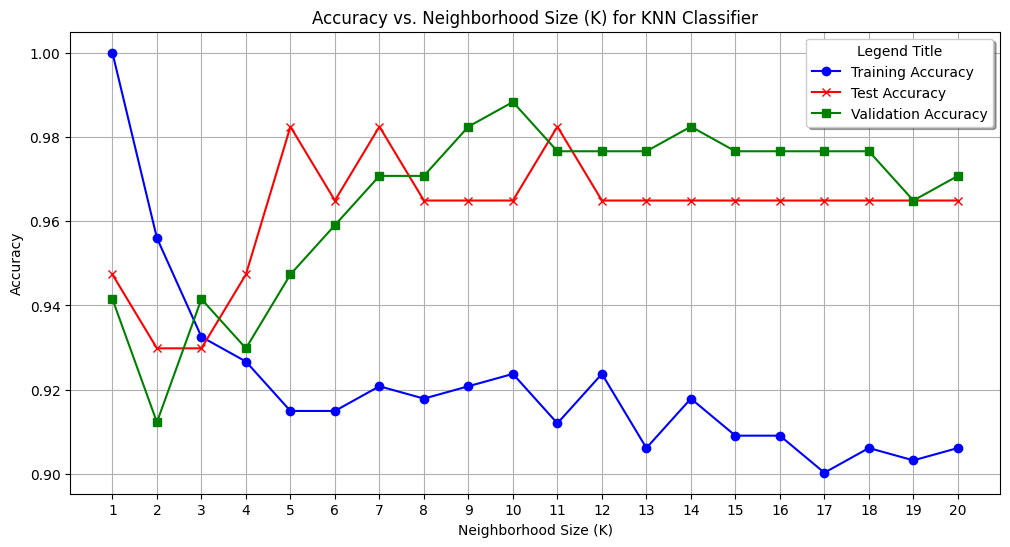

In [32]:
# Plotting the accuracy scores against neighborhood sizes
plt.figure(figsize=(12, 6))
plt.plot(neighborhood_sizes, train_accuracy, color='blue', marker='o', label='Training Accuracy')
plt.plot(neighborhood_sizes, test_accuracy, color='red', marker='x', label='Test Accuracy')
plt.plot(neighborhood_sizes, val_accuracy, color='green', marker='s', label='Validation Accuracy')
plt.title('Accuracy vs. Neighborhood Size (K) for KNN Classifier')
plt.xlabel('Neighborhood Size (K)')
plt.ylabel('Accuracy')
plt.xticks(neighborhood_sizes)  # Set x-ticks to be the neighborhood sizes
plt.legend(loc='upper right', title='Legend Title', frameon=True, shadow=True)
plt.grid(True)
plt.savefig('picture/ans_2.png')
plt.show()

## 　`plt.legend()`関数

`plt.legend()` は Matplotlib ライブラリで使用される関数で、グラフに凡例（legend）を追加するために使われます。凡例は、グラフに複数のプロットがある場合に、それぞれのプロットが何を表しているのかを識別するために役立ちます。各プロットには、通常、異なる色、線のスタイル、マーカーなどが使われます。

`plt.plot()` 関数を使用してグラフに線やマーカーを追加する際に、`label` 引数でラベルを指定することができます。その後、`plt.legend()` 関数を呼び出すことによって、これらのラベルに基づいた凡例がグラフに表示されます。

以下のようなオプションを使用して、凡例の外見や配置をカスタマイズすることもできます：

- `loc`: 凡例の位置を指定します。例えば `'upper left'`, `'lower right'`, `'best'`（最適な位置に自動で配置）などがあります。
- `fontsize`: 凡例のフォントサイズを指定します。
- `title`: 凡例のタイトルを指定します。
- `frameon`: 凡例の周りに枠を付けるかどうかを指定します（`True` または `False`）。
- `shadow`: 凡例に影を付けるかどうかを指定します（`True` または `False`）。

例えば：

```python
plt.legend(loc='upper left', fontsize='large', title='Legend Title', frameon=True, shadow=True)
```

上記のコードは、左上に大きいフォントサイズでタイトル付きの枠と影のある凡例を追加します。